# **CA04 - Ensemble_models**
Name: Xinyu Zhou

Colab link: https://colab.research.google.com/drive/1eyvFyeRBvj_kBAOu6oaTm60n1EfoVQ2l?usp=sharing

# **1. Data Source and Contents**

Same as CA03

In [ ]:
# Import pandas and numpy
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('census_data.csv',na_values='NA')

# **2.  Finding Optimal Value of a key Hyper-parameter**

For Ensemble Models, one of the key hyper-parameter is number of “estimators”.
Following is an example of fining the optimal value of “Maximum Depth”. Review the following code snippet to understand how the optimal value of this hyper-parameter
(Max Depth = 10) is found by plotting a graph




In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
#Perform necessary data cleansing and transformation based on your observations from the data quality analysis
#create a new column with corresponding 1 and 0 value for target column
df['flagNumber']=df.flag.map({ 'train' : 1, 'test' : 0})
#slice the dataset into train and test dataset by flag
train= df[df['flag']=='train']
test= df[df['flag']=='test']
#slice the dataset into x and y dataset
X_train = train.iloc[:, :-3].values
X_test = test.iloc[:, :-3].values
y_train = train.iloc[:, -2:-1].values
y_test = test.iloc[:, -2:-1].values
#Encoding the Independent Variable
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
ct =make_column_transformer((OneHotEncoder(),slice(0,9)))
X_train=ct.fit_transform(X_train)
X_test=ct.fit_transform(X_test)

In [ ]:
#accuracy = accuracy_score(y_test, y_pred) get the increasing curve
#accuracy = np.mean(y_test == y_pred) get the decreasing curve

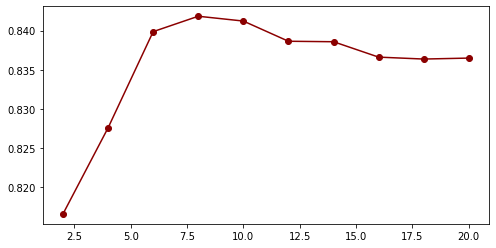

In [ ]:
#the optimal value of “Maximum Depth”
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred', marker='o')
# from the plot, we can tell x=10 is the cutting off point, the curve starts decreasing after 10

# **3. Building a Random Forest Model**
* Using Notebook, and the same data source from CA03, train a Random Forest Model.
* Using similar approach of Section 2 above, plot a graph of Accuracy vs. n_estimator.
* Use n_estimator values as [50,100,150,200,250,300,350,400,450,500]

Answer the following question:
1. Write your observations about the Classifier’s behavior with respect to the
number of estimators

The classifier's accuracy score is changing long with the number of estimators. In this graph, the accuracy is decreasing when estimator from 50 to 250, and arrives the lowest accuracy at n = 250. Then it starts increasing when n from 350 to 500.

2. Is there an optimal value of the estimator within the given range?

Yes, the estimator equals 50 or 500, our accuracy score reaches the highest value.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

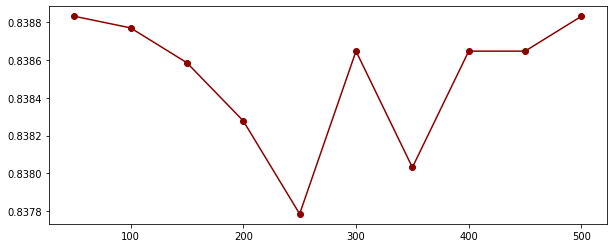

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#the optimal value of “n_estimator”
results = []
estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in estimator:
    model = RandomForestClassifier(n_estimators=trees, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

plt.figure(figsize=(10,4))
pd.Series(results, estimator).plot(color='darkred', marker='o')
# n= 50 or 500, accuracy score is highest(round 0.84)

 # **4.	Building AdaBoost, Gradient Boost (classifier) and XGB Model**
 Repeat the process of Section 3 above for all three models here

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

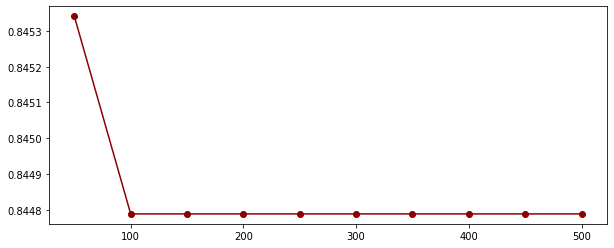

In [ ]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier 
results = []
estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in estimator:
    classifier = AdaBoostClassifier(n_estimators=trees, random_state=101)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

plt.figure(figsize=(10,4))
pd.Series(results, estimator).plot(color='darkred', marker='o')
# n= 50, accuracy score is highest(round 0.854)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

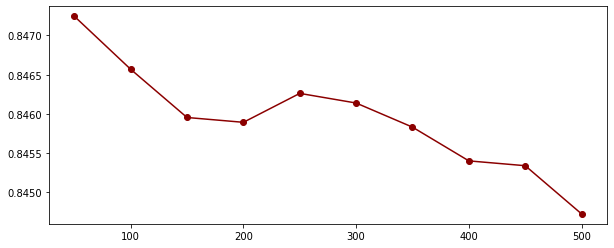

In [ ]:
#Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier
results = []
estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in estimator:
    classifier =  GradientBoostingClassifier(n_estimators=trees, random_state=101)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

plt.figure(figsize=(10,4))
pd.Series(results, estimator).plot(color='darkred', marker='o')
# n= 50, accuracy score is highest(round 0.8475)

In [ ]:
#XGB Model
from xgboost import XGBClassifier
results = []
estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in estimator:
    classifier =  XGBClassifier(n_estimators=trees, random_state=101)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

plt.figure(figsize=(10,4))
pd.Series(results, estimator).plot(color='darkred', marker='o')
# n= 100, accuracy score is highest(round 0.8475)

 # **5. Compare Performance**
Keep all common Hyper-parameters same for four models (Random Forest, AdaBoost,
Gradient Boost, XGB), run them again and create a performance comparison table
within your code and print the same as follows:

Also, print the values of all COMMON Hyper-parameters below this table (from code)


In [ ]:
#Random Forest, AdaBoost, Gradient Boost, XGB
from sklearn.metrics import roc_auc_score
#Random Forest
Random_Forest = DecisionTreeClassifier(max_depth=10, random_state=101)
Random_Forest.fit(X_train, y_train)
y_pred1 = Random_Forest.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
auc1 = roc_auc_score(y_test, y_pred1)
#AdaBoost
adaBoost = AdaBoostClassifier(n_estimators=50, random_state=101)
adaBoost.fit(X_train, y_train)
y_pred2 = adaBoost.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
auc2 = roc_auc_score(y_test, y_pred2)
#Gradient Boost
gBoost = GradientBoostingClassifier(n_estimators=50, random_state=101)
gBoost.fit(X_train, y_train)
y_pred3 = gBoost.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
auc3 = roc_auc_score(y_test, y_pred3)
#XGB
xgbBoost = XGBClassifier(n_estimators=100, random_state=101)
xgbBoost.fit(X_train, y_train)
y_pred4 = xgbBoost.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
auc4 = roc_auc_score(y_test, y_pred4)
# dateframe
df=pd.DataFrame({"Random Forest":[accuracy1 , auc1,'10'], 
                 "AdaBoost":[accuracy2 , auc2,'50'],
                 "Gradient Boost":[accuracy3 , auc3,'50'],
                 "XGB":[accuracy4 , auc4,'100']}) 
df.index = ['Accuracy', 'AUC','max_depth/ n_estimators'] 
df
#print the values of all COMMON Hyper-parameters below this table (from code)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.841226,0.845341,0.847245,0.847368
AUC,0.748614,0.748884,0.746269,0.754072
max_depth/n_estimators,10,50,50,100
